<a href="https://colab.research.google.com/github/ecomunick/omdena/blob/main/Advanced_DS/MLDS_2Assignment_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: Implement and analyze various machine learning algorithms discussed in the lecture.

Task 1: Data Preparation (5 Marks)

*   Load a dataset of your choice.
*   Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.


### Let's use Medical insurance dataset from Kaggle

## Libraries

In [95]:
# Import Libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, f1_score, accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesRegressor

## Details of the data

### Dictionary
This dataset has 7 variable - 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region):

1. Age: age of primary beneficiary.

2. Sex: insurance contractor gender, female, male.

3. BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

4. Children: Number of children covered by health insurance/Number of dependents.

5. Smoker: Is the person a smoker or not.

6. Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. Charges (expenses): Individual medical costs billed by health insurance.

In [96]:
df= pd.read_csv('/content/med_insurance.csv')

In [97]:
# Take a look at the dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [98]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
print("This dataset contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This dataset contains 1338 rows and 7 columns.


In [100]:
# let's see the statistical description of numerica variables
df.describe().T # transpose the statistical description for a better view

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [101]:
# Expenses - Mean > Median implies the data is right skewed (positively skewed)
df.skew()

<ipython-input-101-81be6ebd34b3>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

In [102]:
# let's see the statistical description of categorical variables
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


## Exploratory Data Analysis

In [103]:
# Let's see a pairplot visualizes relationships between pairs of variables in the medical insurance dataset,
# with data points colored by gender ('sex'). Each scatterplot represents the relationship between two variables,
# allowing for the examination of correlations and distributions within different gender categories.

Let's see a pairplot visualizing relationships between pairs of variables in the medical insurance dataset, with data points colored by gender ('sex'). Each scatterplot represents the relationship between two variables, allowing for the examination of correlations and distributions within different gender categories.

<Figure size 3500x3500 with 0 Axes>

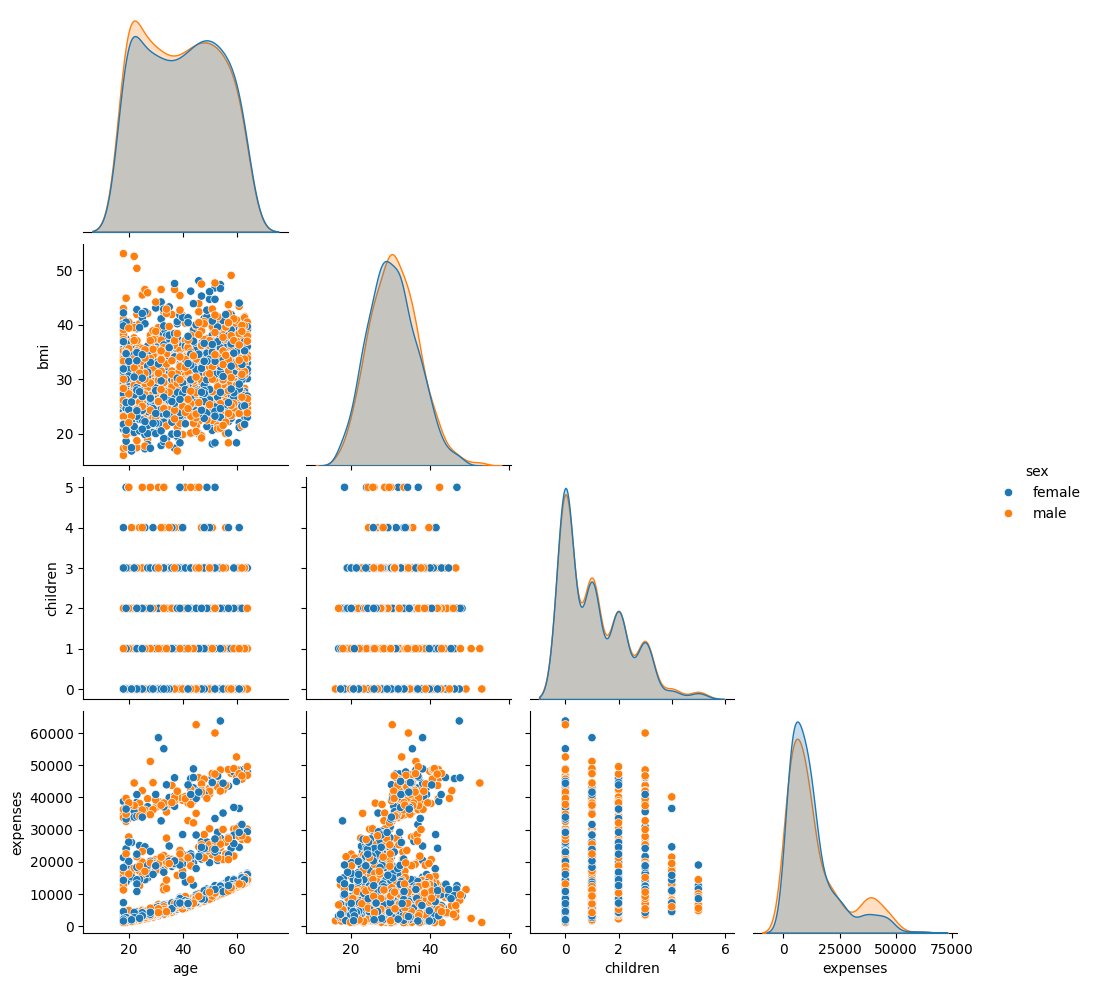

In [104]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='sex', corner = True)

In [105]:
# Looks like the expense increase with ages for both genders but at the end, is not a clear a differention between genders.

Let's see now a pairplot visualizing relationships between pairs of variables in the medical insurance dataset, with data points colored by gender ('smoker'). Each scatterplot represents the relationship between two variables, allowing for the examination of correlations and distributions within different smoker categories.



<Figure size 3500x3500 with 0 Axes>

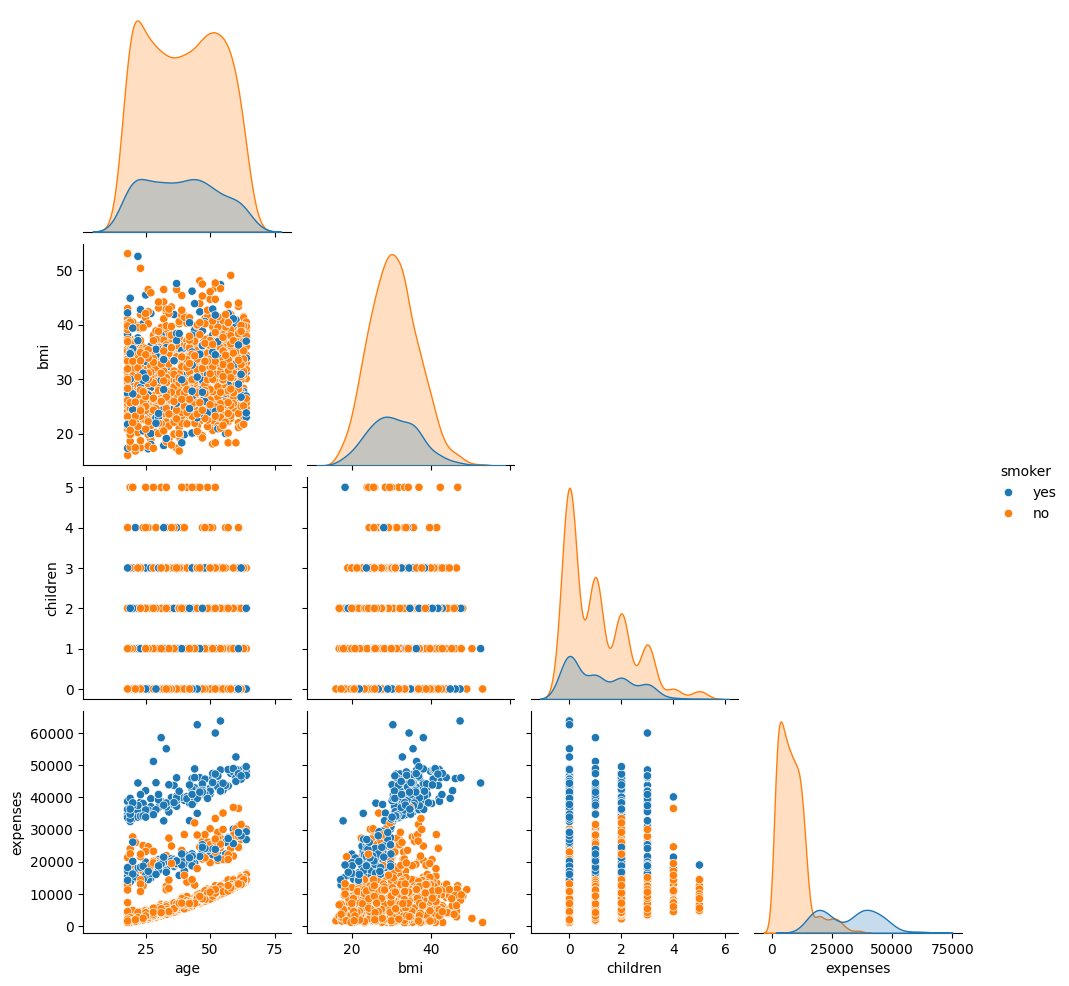

In [106]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='smoker', corner = True)

In [107]:
# Is clearly visible that smokers people pay high expenses in medical insurance.
# let's have a look in those 2 variables

<Axes: xlabel='expenses', ylabel='Count'>

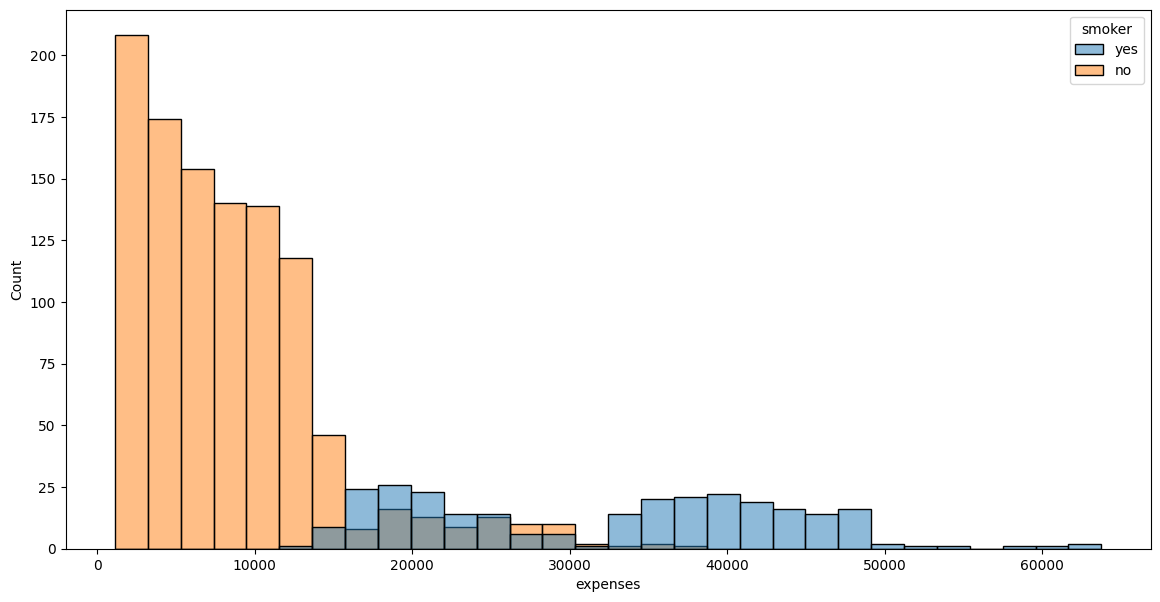

In [108]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='expenses', hue='smoker')

In [109]:
# Smokers seem to have higher charges
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [110]:
# Get value counts for the 'smoker' column
smoker_counts = df['smoker'].value_counts()

# Calculate percentages and round to 2 decimal places
smoker_percentages = ((smoker_counts / len(df)) * 100).round(2)

print(smoker_percentages)

# even though unbalanced smokers data

no     79.52
yes    20.48
Name: smoker, dtype: float64


<Axes: xlabel='smoker', ylabel='count'>

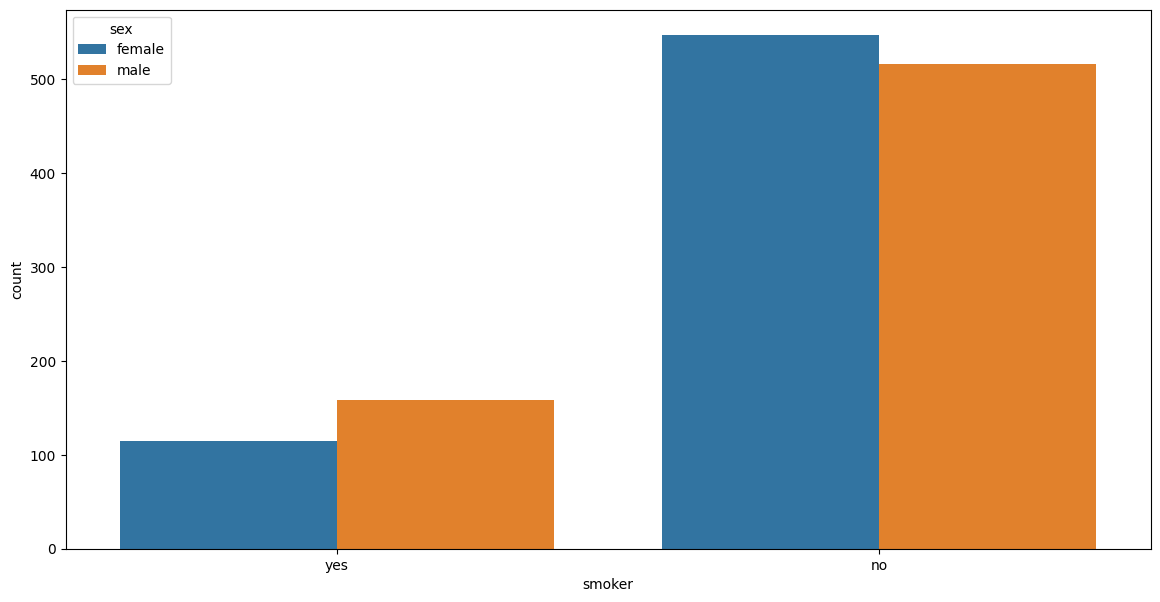

In [111]:
# Let's visualize 'smokers' by 'sex'
plt.figure(figsize=(14,7))
sns.countplot(data= df, x='smoker', hue='sex')

In [112]:
# Seem 'males' smokes more than 'females'

<Axes: xlabel='age', ylabel='expenses'>

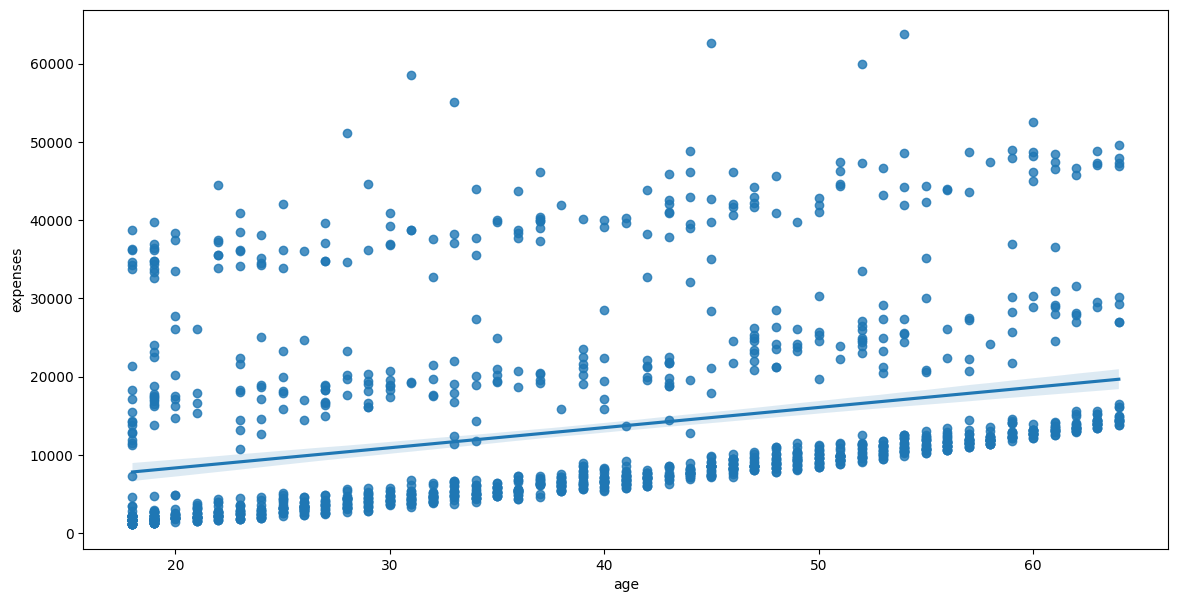

In [113]:
# Let's visualize relation btw 'ages' by 'expenses'
plt.figure(figsize=(14,7))
sns.regplot(data= df, x='age', y='expenses')

<Axes: xlabel='bmi', ylabel='expenses'>

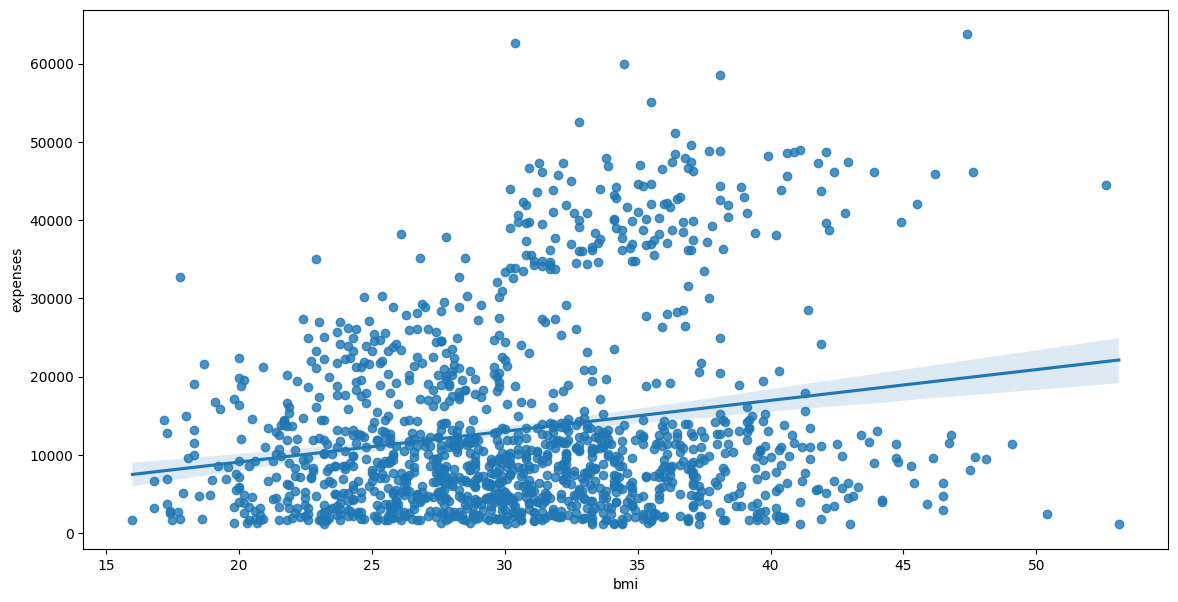

In [114]:
# Let's visualize relation btw 'BMI' by 'expenses'
plt.figure(figsize=(14,7))
sns.regplot(data= df, x='bmi', y='expenses')

<Axes: xlabel='bmi', ylabel='expenses'>

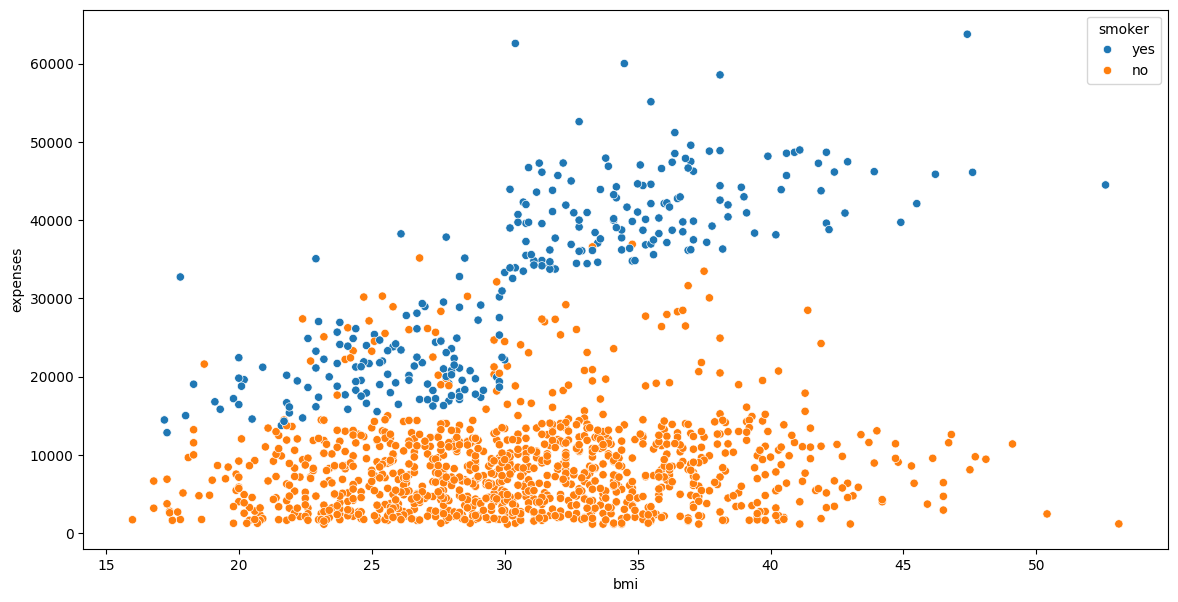

In [115]:
# Let's visualize relation btw 'BMI' by 'expenses' splitting by smokers person
plt.figure(figsize=(14,7))
sns.scatterplot(data= df, x='bmi', y='expenses', hue='smoker')

In [116]:
# Above is more visible that people who smoke pay high medical expenses

<Axes: xlabel='bmi', ylabel='expenses'>

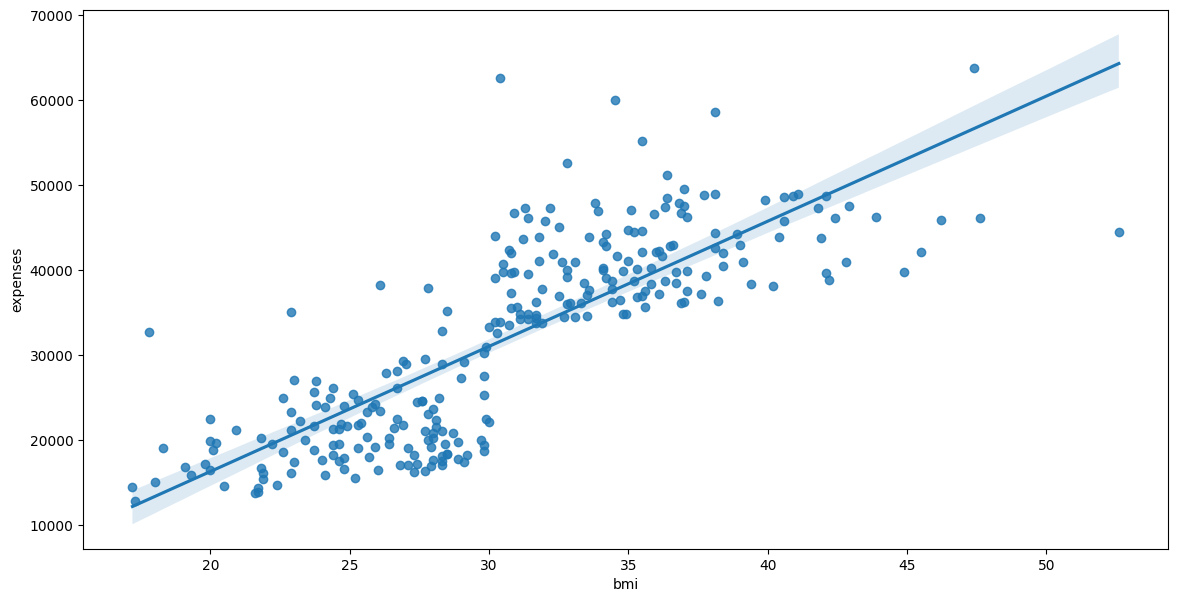

In [117]:
# Now let's have a look into only in 'smokers' person by 'BMI' and 'expenses''
plt.figure(figsize=(14,7))
smoker_df = df[df['smoker'] == 'yes']
sns.regplot(data= smoker_df, x='bmi', y='expenses')

<Axes: xlabel='bmi', ylabel='expenses'>

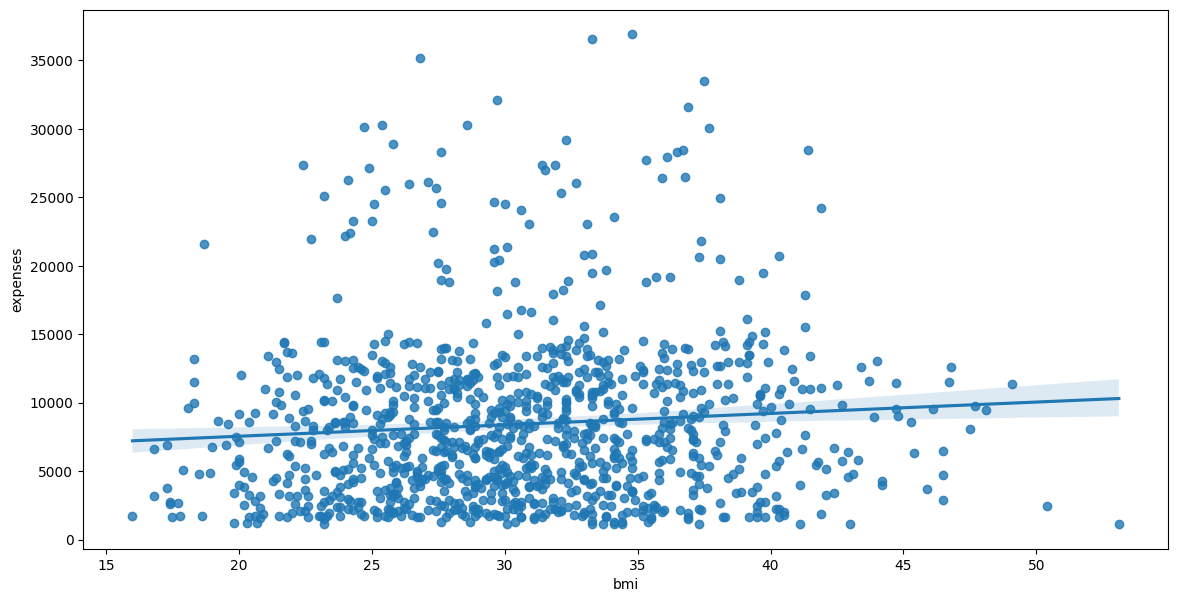

In [118]:
# Now let's have a look into only in 'smokers' person by 'BMI' and 'expenses''
plt.figure(figsize=(14,7))
no_smoker_df = df[df['smoker'] == 'no']
sns.regplot(data= no_smoker_df, x='bmi', y='expenses')

In [119]:
3 # Expesenses seem to increase with Body Mass inedx (bmi)

3

<Axes: xlabel='children', ylabel='expenses'>

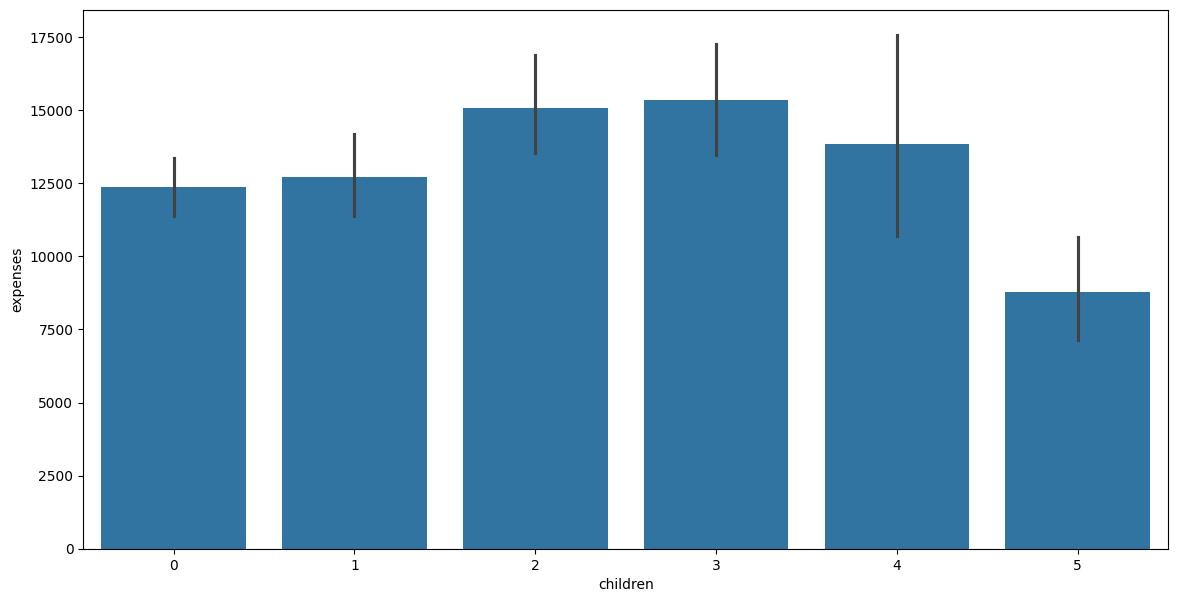

In [120]:
# Let's explore other expenses relationships (variables)
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='children', y='expenses')

In [121]:
# Looks like people with five (5) children have the lowest expenses.

<Axes: xlabel='region', ylabel='expenses'>

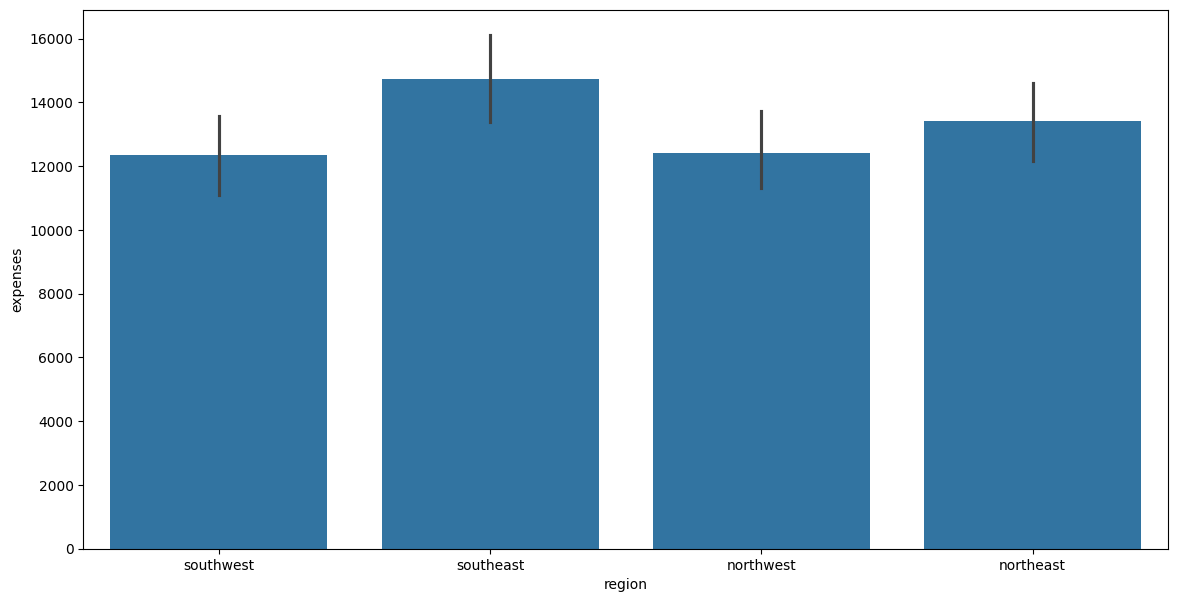

In [122]:
# Let's explore other expenses relationships (variables)
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='region', y='expenses')

## Feature Engineering

In [123]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['sex', 'smoker', 'region'],drop_first = True)

In [124]:
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [125]:
# Extracting features (X - independent variables) and the target variable (y - dependent variable).

X=df.drop(columns=['expenses'], axis=1)
y=df['expenses']

# Model bulding

In [126]:
# Split data into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [127]:
# Innitialize and train the Linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
# Make prediction
y_pred = lr.predict(X_test)

In [129]:
y_pred

array([11169.56524371,  9495.28140175, 38192.2751891 , 16272.56889341,
        6929.96178156,  3970.26590747,  1573.76087555, 14390.95817905,
        9009.78612784,  7520.84083061,  4490.96463448, 10272.53455501,
        8801.37394797,  3792.90573915, 27924.76025866, 10727.39822471,
       11280.77237593,  6108.07110568,  8254.50887562, 27147.81954066,
       33643.90520752, 14348.45162683, 11744.39450499, 32124.27185603,
        4179.19037393,  9243.08410357,  1086.15066128,  9803.65232809,
        3756.0129143 , 10433.46049508,  9013.07523577, 40059.13571154,
       15688.58510478, 13879.2743715 , 24750.60187105,  5155.48951725,
       12620.2363938 , 30768.67934312, 33557.47755483,  3672.26234592,
        3989.22674861,  3972.27809165, 30522.63590008, 39519.26568884,
       27825.70959999,  5100.2756589 , 10592.98335701,  7823.9150248 ,
        3576.43856836, 10217.40499682,  5732.04268572,  3417.12445131,
       33019.41573948, 38489.49071529, 16048.97069081,  7152.75169167,
      

In [130]:
# from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [131]:
score

0.8000184017333827

### Decision Tree Regressor (for continuous variable)

In [132]:
# Initialize and train the decision tree regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [133]:
# Make prediction on the testing set
y_pred = dt_model.predict(X_test)

In [134]:
score = r2_score(y_test, y_pred)

In [135]:
score

0.6745251876255741

## Finding the Most Influencing Feature

In [136]:
#from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [137]:
print(selection.feature_importances_)

[0.12955386 0.1904642  0.02415679 0.01054018 0.62059197 0.00947582
 0.00852593 0.00669126]


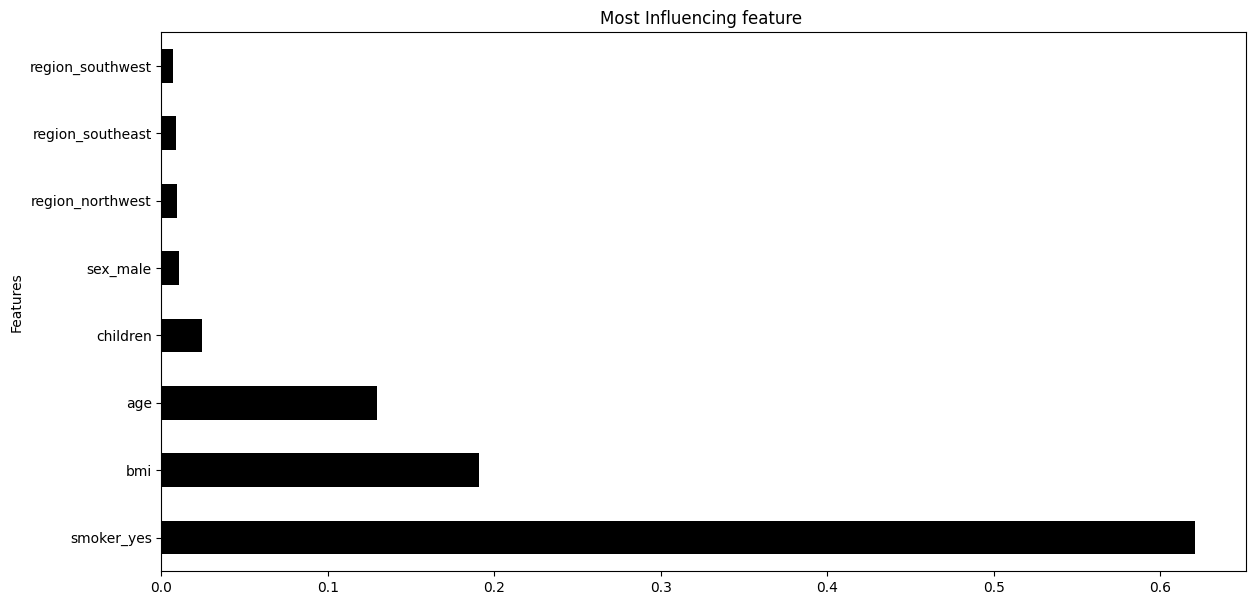

In [140]:
plt.figure(figsize = (14,7))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='black')
plt.show()

## Final conclusion


*   At the end, we have a Rˆ2 of 80% w/ **Linear Regressio**n model and 71% with **Decision Tree Regressor** shown us the LR model fits better for that purpose.
*   Smokers is the most influencing feature which affect the Insurance Charges followed by BMI.
*   Who has the habit of smoking need to pay high Insurance.




